# Conformational selection dropping correlated features

In [1]:
import pandas as pd
import numpy as np
import glob, os, sys
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='notebook', style = 'whitegrid', font_scale = 1.3)
sys.path.append('..')

In [3]:
# Helper function
%run ./helper_functions_S6.ipynb

### Load the data:

In [4]:
# Dictionary of docking results
scores_dic = get_docking_scores_dict()

We're going to use CSAR results (with Vinardo) as example.

In [5]:
df_test = scores_dic['CSAR']['Dk_sc']['X']
activity = scores_dic['CSAR']['Dk_sc']['y']
df_test['Activity'] = activity
df_test['key'] = df_test.index
df_test['key'] = df_test['key'].str.split('(\d+)').str[1].astype(int)
df_test['key']

df_test.sort_values(by = ['Activity', 'key'], ascending = True, inplace = True)
df_test = df_test.drop(['key'], axis = 1)

### Using the Docking Score Ranking for each conformation

The following example uses the active/inactive positions inside the ranked list of ligands for each protein conformation. 
> Therefore, in the data frame below: 
- The columns correspond to each protein conformation.
- Each row represents a position inside the ranking of each protein.
- The value of each cell (i,j) indicates if, in the position i of the ranking list of the protein j, there is an active molecule (0) or an inactive one (0).


In [9]:
df_actives_pos = pd.DataFrame()
# For each column in the original dataframe:
# - Sort the dk score values and get the 'Activity' column, which indicates if a molecule is active or not
# - Merge the column to the new dataframe
for column in df_test.iloc[:, :-1]:
    actives_rank = df_test[['Activity', column]].sort_values(by = column)['Activity'].to_numpy()
    df_actives_pos[column] = actives_rank
    
df_actives_pos.head()

,1aq1,1b38,1b39,1buh,1ckp,1di8,1dm2,1e1v,1e1x,1e9h,...,6q4b,6q4c,6q4d,6q4e,6q4f,6q4g,6q4h,6q4i,6q4j,6q4k
0,0,0,1,1,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
1,1,1,0,0,1,1,1,1,1,1,...,0,0,0,1,0,0,0,0,0,1
2,1,0,1,1,1,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
3,1,0,1,0,1,0,1,0,0,0,...,0,1,1,1,0,0,0,0,0,0
4,0,0,1,0,1,1,1,1,0,1,...,1,0,1,1,1,0,0,1,1,0


#### Visualization
The image below shows a visual representation of the `df_actives_pos` data frame, shown above. Again, each column belongs to the ranked list of each protein (using the docking score obtained with Vinardo). Cells in red correspond to active molecules.

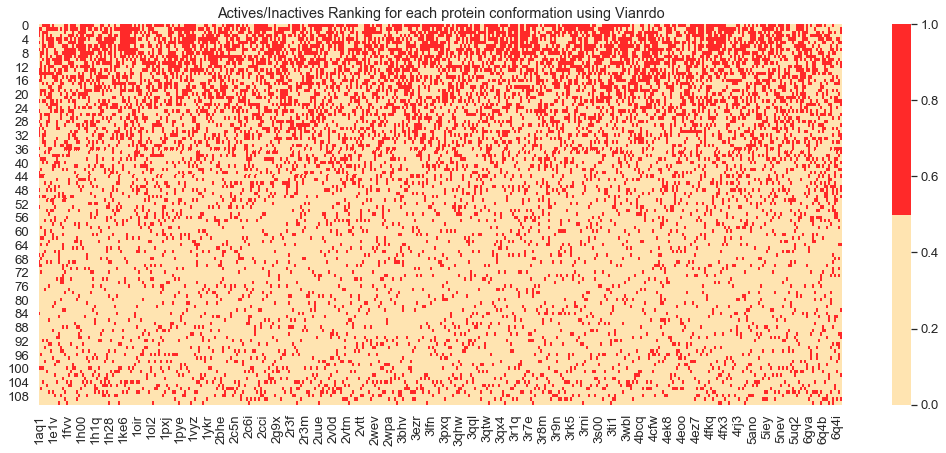

In [14]:
# Plot the ranked active/inactive molecules
sns.set(font_scale=1.2)
fig, ax1 = plt.subplots(figsize=(18, 7))
sns.heatmap(df_actives_pos, vmin = 0, vmax = 1, cmap = ['#FFE4B1','#FF2929'], ax= ax1)\
            .set_title('Actives/Inactives Ranking for each protein conformation using Vinardo')
plt.show()

#### Clustermap of the protein conformations using jaccard/tanimoto similarity
The following image is similar to the above one, but in this case, the protein conformations have been rearranged by similarity. For this purpose, a hierarchical Clustering has been performed using the Jaccard distance, which is complementary to the Tanimoto similarity coefficient.

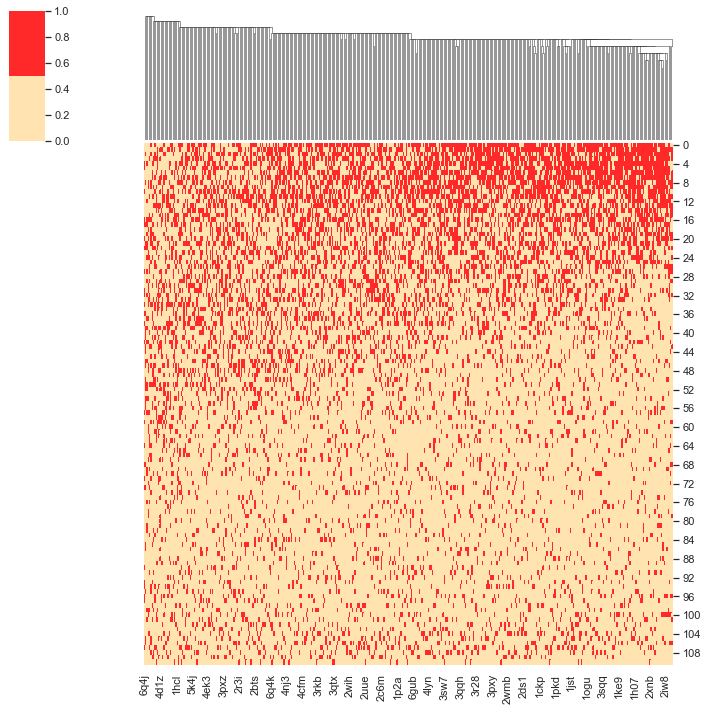

In [11]:
sns.set(font_scale=1)
sns.clustermap(df_actives_pos, cmap =['#FFE4B1','#FF2929'], 
               col_cluster = True, row_cluster = False,
               metric = 'jaccard', method = 'single');

### Using the ranking positions of each ligand in the 404 protein conformations
This procedure is different. Here we directly assign the molecule's rank to itself.

> Therefore, in the data frame below: 
- The columns correspond to each protein conformation.
- Each row represents the same molecule (e.g., the first row always corresponds to the CS5 molecule)
- The last 26 rows belong to the active molecules.
- The value of each cell (i, j) indicates the ranking position (which goes from 1 to 111) of the molecule i, inside the ranking list of the protein conformation j.

In [12]:
df_rankings = df_test.iloc[:,:-1].rank(axis = 0)
df_rankings

,1aq1,1b38,1b39,1buh,1ckp,1di8,1dm2,1e1v,1e1x,1e9h,...,6q4b,6q4c,6q4d,6q4e,6q4f,6q4g,6q4h,6q4i,6q4j,6q4k
Ligando,,,,,,,,,,,,,,,,,,,,,
CS5,81.5,76.5,82.5,96.5,45.0,79.5,97.0,72.5,88.0,87.0,...,71.0,67.5,63.5,90.0,87.5,75.5,69.0,93.0,77.5,73.5
CS27,99.0,89.5,82.5,85.5,103.0,85.5,80.0,91.5,84.5,96.5,...,94.0,94.0,98.5,81.5,100.0,98.5,95.0,77.0,88.0,101.0
CS29,1.0,57.0,69.5,40.0,19.5,31.0,17.0,27.0,18.5,7.0,...,15.0,40.0,33.0,54.0,27.5,31.5,25.0,73.5,45.0,25.5
CS31,21.0,19.0,12.5,2.0,16.5,22.5,31.0,27.0,36.5,50.5,...,26.5,20.5,21.5,28.5,40.5,25.5,14.0,37.5,19.0,18.5
CS32,19.0,30.5,24.5,53.5,72.0,79.5,31.0,27.0,48.0,68.0,...,33.0,40.0,28.5,28.5,32.5,65.0,59.0,16.5,37.5,54.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CS247,2.0,2.0,3.0,2.0,1.0,2.0,5.5,2.0,8.0,4.0,...,5.5,5.0,4.0,4.0,6.0,1.0,8.5,8.0,11.0,4.0
CS248,31.0,30.5,19.0,32.5,5.5,25.0,23.0,20.5,54.0,17.5,...,46.5,32.5,21.5,28.5,22.5,31.5,51.5,25.0,72.5,36.0
CS260,46.5,20.0,14.5,17.0,11.0,7.5,27.0,11.5,13.5,39.0,...,12.0,12.0,21.5,5.0,27.5,12.0,25.0,22.5,37.5,4.0


#### Visualization

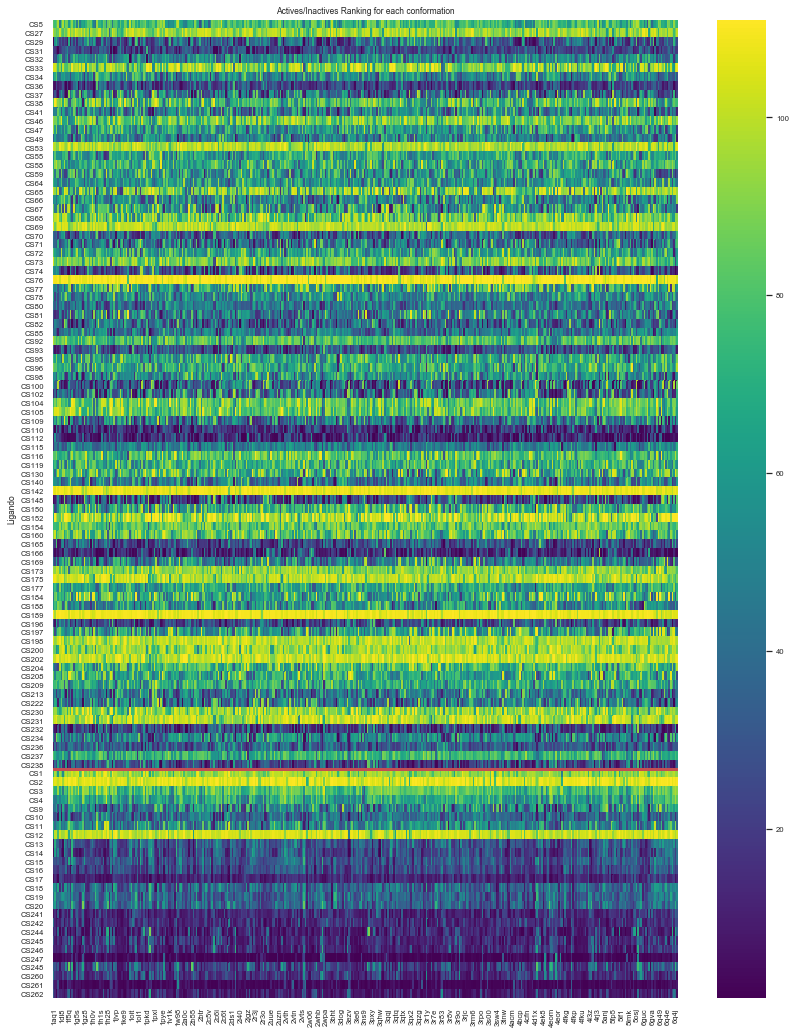

In [23]:
sns.set(font_scale=0.7)
fig, ax1 = plt.subplots(figsize=(14, 18))
sns.heatmap(df_rankings, 
            cmap = 'viridis', ax= ax1)\
            .set_title('Actives/Inactives Ranking for each conformation')
ax1.axhline(y=111 -26, color = 'r', linewidth = 3)
plt.show()

#### Clustermap

/home/linuxlite/anaconda3/envs/mds/lib/python3.6/site-packages/seaborn/matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


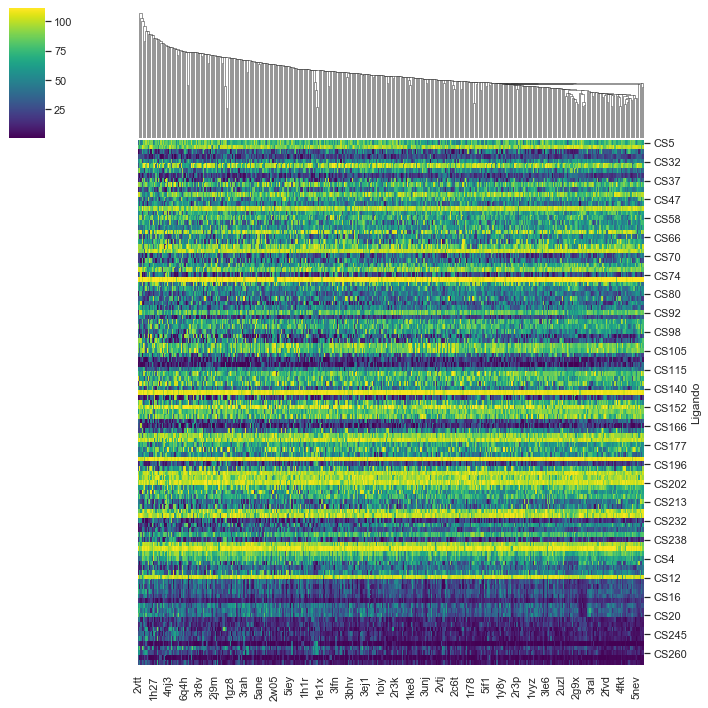

In [16]:
sns.set(font_scale=1)
sns.clustermap(df_rankings, cmap = 'viridis', 
               col_cluster = True, row_cluster = False,
               metric = 'correlation', method = 'single');

## Drop Highly Correlated Features

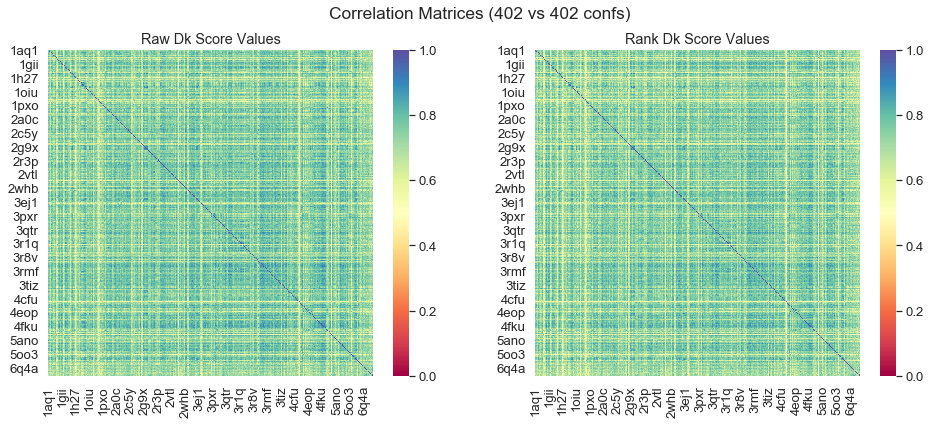

In [27]:
# Get the correlation matrix
# Pearson 
corr_pear = df_test.drop(['Activity'], axis = 1).corr()
# Spearman 
corr_spear = df_test.drop(['Activity'], axis = 1).corr(method = 'spearman')

# Plot the correlation matrix using Pearson or Spearman coeficients
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
sns.heatmap(corr_pear, vmin = 0, vmax = 1, cmap = 'Spectral', ax= ax1)\
                                        .set_title('Raw Dk Score Values')
sns.heatmap(corr_spear, vmin = 0, vmax = 1, cmap = 'Spectral', ax= ax2)\
                                        .set_title('Rank Dk Score Values')
fig.suptitle('Correlation Matrices (402 vs 402 confs)')
plt.show()

### Example: Measuring the Spearman correlation between conformations using ranking positions

First, let's create a data frame with only three conformations, and then add a fifth conformation with the 'ideal' ranking, i.e., a ranking list in which 

In [29]:
df_example = df_rankings[['3pxf', '3pxz', '2vv9']].copy()
df_example['ideal'] = np.arange(111, 0, -1)
df_example

,3pxf,3pxz,2vv9,ideal
Ligando,,,,
CS5,99.0,88.0,74.0,111
CS27,102.5,103.0,74.0,110
CS29,25.5,32.5,36.5,109
CS31,46.0,59.5,27.0,108
CS32,77.0,70.5,54.5,107
...,...,...,...,...
CS247,1.0,2.5,1.0,5
CS248,71.5,59.5,10.5,4
CS260,22.5,26.0,22.0,3


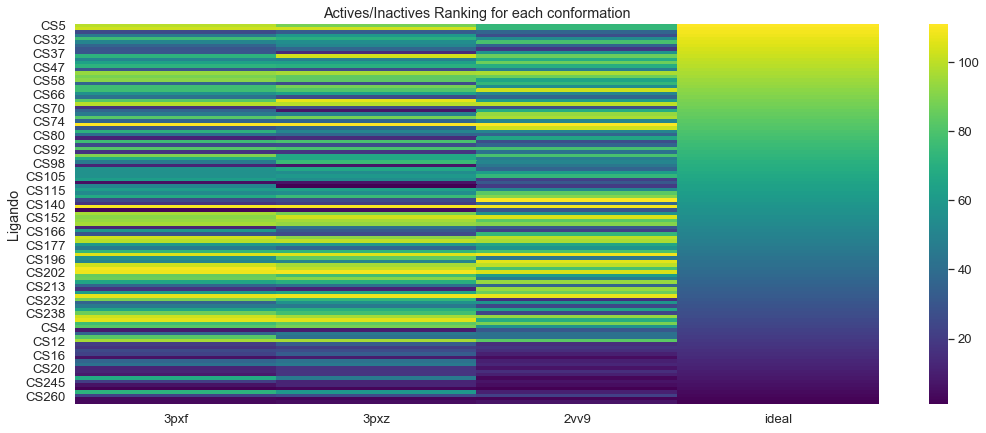

,3pxf,3pxz,2vv9,ideal
3pxf,1.000000,0.930888,0.630753,0.192161
3pxz,0.930888,1.000000,0.644127,0.200606
2vv9,0.630753,0.644127,1.000000,0.376186
ideal,0.192161,0.200606,0.376186,1.000000


In [24]:
sns.set(font_scale=1.2)
fig, ax1 = plt.subplots(figsize=(18, 7))                   

sns.heatmap(df_example, cmap = 'viridis', ax= ax1)\
            .set_title('Actives/Inactives Ranking for each conformation')
plt.show()

df_example.corr()

The following functions allow to drop correlated features recursively.

In [43]:
def correlation(dataset, threshold):
    # Creates a dictionary with feature names and a counter initialized at zero
    counter_of_corrs = {f: 0 for f in dataset.columns}
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr(method='spearman')
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold):
                colname_i = corr_matrix.columns[i] # getting the name of column i
                colname_j = corr_matrix.columns[j] # getting the name of column j
                counter_of_corrs[colname_i] += 1
                counter_of_corrs[colname_j] += 1
    # Trasnform the result to a series
    counter_of_corrs = pd.Series(counter_of_corrs)
    return(counter_of_corrs)

def drop_features(dataset, thr, min_thr, step, list_of_droped_features, verbose = False):
    counter_of_corrs = correlation(dataset, thr)
    max_n_correlations = counter_of_corrs.max()
    if max_n_correlations > 0:
        # Get the features with the max value
        features = counter_of_corrs[counter_of_corrs == max_n_correlations]
        features_names = [i for i in features.index]
        if verbose: print(features_names)
        # Drop one feature ramdomly
        feature_to_drop = np.random.choice(features_names)
        list_of_droped_features.append(feature_to_drop)
        if verbose: print('Droped conf:', feature_to_drop, '-> rho =', round(thr, 3))
        new_dataset = dataset.drop([feature_to_drop], axis = 1)
        # Recursively
        drop_features(new_dataset, thr, min_thr, step, list_of_droped_features, verbose)
    elif thr >= min_thr:
        #print(thr, min_thr)
        drop_features(dataset, thr - step, min_thr, step, list_of_droped_features, verbose)

def features_to_drop(dataset, min_thr, max_thr, step, verbose = False):
    dataset = dataset.copy()
    list_of_droped_features = []
    # User recursion to find
    drop_features(dataset, max_thr, min_thr, step, list_of_droped_features, verbose = verbose)
    return(list_of_droped_features)

#### Dropping example  

In [46]:
_test = features_to_drop(df_rankings, max_thr = 1, min_thr = 0.91, step =  0.01, verbose = True)

['3pxf', '3pxz']
Droped conf: 3pxz -> rho = 0.93
['2g9x', '2iw9', '2xnb', '3qtz', '3rjc', '3rk5', '3rk7', '3rpv', '3s0o', '3sw4', '3sw7', '4ek8', '4eoi', '4eop']
Droped conf: 3rjc -> rho = 0.92
['2g9x', '2iw9', '2xnb', '3qtz', '3rk5', '3rk7', '3rpv', '3sw4', '3sw7', '4ek8', '4eoi', '4eop']
Droped conf: 3sw7 -> rho = 0.92
['2g9x', '2iw9', '2xnb', '3qtz', '3rk5', '3rk7', '3rpv', '4ek8', '4eoi', '4eop']
Droped conf: 3qtz -> rho = 0.92
['2g9x', '2iw9', '2xnb', '3rk5', '3rk7', '4ek8', '4eoi', '4eop']
Droped conf: 3rk5 -> rho = 0.92
['2g9x', '2iw9', '2xnb', '4ek8', '4eoi', '4eop']
Droped conf: 2xnb -> rho = 0.92
['2g9x', '2iw9', '4eoi', '4eop']
Droped conf: 2g9x -> rho = 0.92
['4eoi', '4eop']
Droped conf: 4eop -> rho = 0.92
['1oi9', '2fvd', '2iw9', '3py0', '3qtx', '3r1q', '3r28', '4acm', '4fkv', '5iev']
Droped conf: 3py0 -> rho = 0.91
['1oi9', '2fvd', '2iw9', '3qtx', '3r1q', '3r28', '4fkv', '5iev']
Droped conf: 3r28 -> rho = 0.91
['1oi9', '2fvd', '2iw9', '3qtx', '4fkv', '5iev']
Droped conf: 

## Get the list of features to drop

#### Create a list of features to be used given a k value

In [147]:
all_confs = df_rankings.columns
list_of_positions = [i for i in range(0, 402)]
list_of_confs_per_k = []
# append the last row with all conformations
list_of_confs_per_k.append([i for i in range(0, 402)])
for conf, idx in zip(features_to_drop, range(401, -1, -1)):
    # Find the position                    
    idx = df_rankings.columns.get_loc(conf)
    # Remove from list
    list_of_positions.remove(idx)
    remained_ = list_of_positions.copy()
    list_of_confs_per_k.append(remained_)


df_confs_per_k = pd.DataFrame({'list_of_confs_corr': list_of_confs_per_k})
df_confs_per_k.sort_index(inplace=True, ascending = False)
df_confs_per_k.reset_index(inplace = True)
df_confs_per_k.drop(['index'], axis = 1, inplace = True)
# Save the result
output_dir = '../data/ml_evaluations'
file_list_of_confs_per_k =  F'{output_dir}/list_of_confs_per_k_drop_correlated_features.json'
df_confs_per_k.to_json(file_list_of_confs_per_k)

### Last Features dropped

In [149]:
# features_to_drop = features_to_drop(df_rankings, max_thr = 1, min_thr = 0.0, step =  0.01, verbose = False)
# features_to_drop[-3:]

['3r1y', '1ol2', '2vtt']

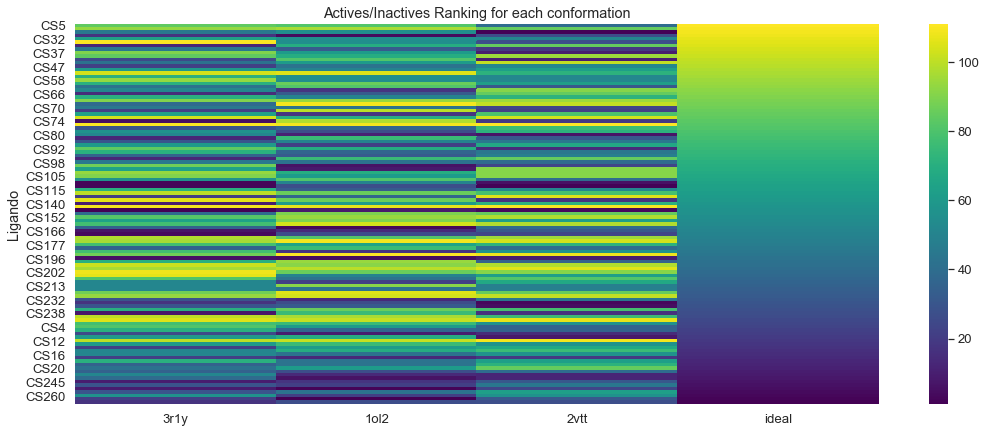

,3r1y,1ol2,2vtt,ideal
3r1y,1.000000,0.518691,0.512071,0.113712
1ol2,0.518691,1.000000,0.498699,0.170293
2vtt,0.512071,0.498699,1.000000,0.054622
ideal,0.113712,0.170293,0.054622,1.000000


In [150]:
df_example = df_rankings[['3r1y', '1ol2', '2vtt']].copy()
df_example['ideal'] = np.arange(111, 0, -1)
df_example
sns.set(font_scale=1.2)
fig, ax1 = plt.subplots(figsize=(18, 7))                   

sns.heatmap(df_example, cmap = 'viridis', ax= ax1)\
            .set_title('Actives/Inactives Ranking for each conformation')
plt.show()

df_example.corr()

In [146]:
# We are going to keep the spearman correaltion matrix usin the ranked values

In [129]:
# Next step, clustering using ward hierarchical clustring

The following example goes from a correlation coeficient threshold = 1 to a correlation coef. equals to 0.9, with a size step = 0.01.

In [142]:
len(df_confs_per_k.iloc[-1:, 0].values[0])

401

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc_corr = AgglomerativeClustering(n_clusters = 3, 
                                  #distance_threshold = 0,
                                  linkage = 'complete')
hc_corr.fit(corr_kendall)

In [ ]:
# Get the labels of a ginven cutoff
k3_labels = hc_corr.labels_

In [ ]:
# Convert to a distance matrix
from modules.MDS import cMDS

dist_corr = 1 - corr_kendall

mds_corr = cMDS(dist_corr)

# Plt the cMDS
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x = mds_corr[0][0], y = mds_corr[0][1], hue= k3_labels, palette = 'viridis')

In [ ]:
# Performing a PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(PCA(n_components=2))

pipe.fit_transform(df_test)
# Plot
fig = plt.figure(figsize = (8,8))
sns.scatterplot(x = pipe['pca'].components_[0], y = pipe['pca'].components_[1], 
                hue= k3_labels, palette = 'viridis')

pipe['pca'].explained_variance_ratio_

In [ ]:
# Tanimo to coeficient / jaccard
import scipy

scipy.spatial.distance.jaccard(df_test['1aq1'], df_test['1aq1'])

In [ ]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(hc_corr, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()